# Question 1: The Baseline (Logistic Regression)

**Dataset:** sklearn.datasets.load_breast_cancer

**Objective:** Build a classifier to detect malignant tumors and tune it for medical safety.

**Task:** Load the dataset and split it (80% Train, 20% Test). Train a standard LogisticRegression model.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

In [10]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Classes: Malignant ({np.sum(y == 0)}), Benign ({np.sum(y == 1)})")

Dataset: 569 samples, 30 features
Classes: Malignant (212), Benign (357)


In [3]:
# Split the dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 455
Test set size: 114


In [4]:
# Train a standard Logistic Regression model
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = lr_model.predict(X_test)

print("Model Training Complete!")

Model Training Complete!


## Deliverable: Accuracy and Confusion Matrix

In [5]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Accuracy: 0.9649 (96.49%)


In [11]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"\nCorrectly classified: {cm[0][0]} malignant, {cm[1][1]} benign")
print(f"Errors: {cm[0][1]} false negatives (missed cancer), {cm[1][0]} false positives")

Confusion Matrix:
[[39  3]
 [ 1 71]]

Correctly classified: 39 malignant, 71 benign
Errors: 3 false negatives (missed cancer), 1 false positives


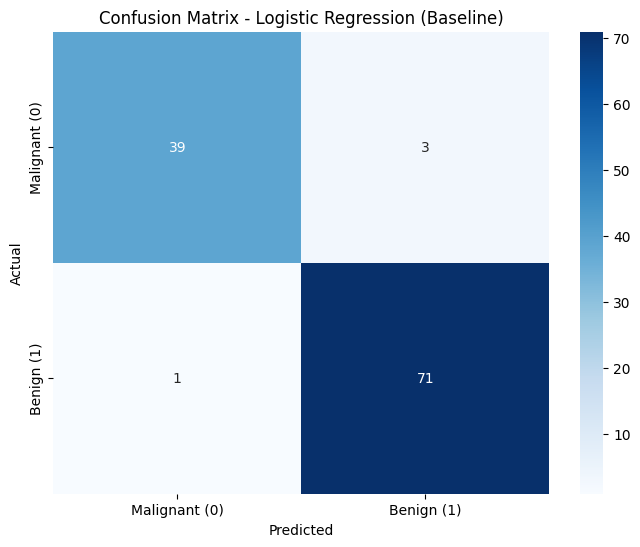

In [7]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant (0)', 'Benign (1)'],
            yticklabels=['Malignant (0)', 'Benign (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression (Baseline)')
plt.show()

In [8]:
# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))


Classification Report:
              precision    recall  f1-score   support

   Malignant       0.97      0.93      0.95        42
      Benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Analysis: False Negatives in Medical Context

In [13]:
# Extract False Negatives from confusion matrix
# False Negatives = Malignant cases predicted as Benign (missed malignant cases)
false_negatives = cm[0][1]

print(f"Number of False Negatives: {false_negatives}")
#These are malignant tumors incorrectly classified as benign.

Number of False Negatives: 3


### Why False Negatives are Dangerous in Medical Context

Our model made **3 False Negatives** - meaning it missed 3 malignant (cancerous) tumors by classifying them as benign.

**Why this is dangerous:**

1. **Missed Cancer Diagnoses** - Patients with cancer are told they're healthy, delaying treatment
2. **Disease Spreads** - Cancer can metastasize while untreated, making it harder to cure
3. **Life-Threatening** - Early detection saves lives; missing cancer can be fatal
4. **False Sense of Security** - Patients won't seek help until symptoms worsen

**Conclusion:**

In medical diagnostics, missing a cancer case (False Negative) is far more dangerous than a false alarm (False Positive). It's better to have extra tests than to miss treating cancer early.

# Question 2: The "Safety" Adjustment (Threshold Tuning)

**Context:** In medicine, we prefer a "False Alarm" (biopsy a healthy person) over "Missing a Cancer".

**Task:** Instead of using the default `.predict()` (threshold = 0.5), use `.predict_proba()` and lower the threshold to 0.1.

**Action:** If the model is even 10% sure it's cancer, predict "Malignant".

In [22]:
# Get probability predictions
y_proba = lr_model.predict_proba(X_test)

# View the first 5 probability predictions
print("Format: [P(Malignant), P(Benign)]")
for i in range(5):
    print(f"Sample {i+1}: {y_proba[i]} -> Actual: {y_test[i]}")

Format: [P(Malignant), P(Benign)]
Sample 1: [1.00000000e+00 3.41657281e-11] -> Actual: 0
Sample 2: [3.51717079e-05 9.99964828e-01] -> Actual: 1
Sample 3: [0.94932865 0.05067135] -> Actual: 0
Sample 4: [0.39551751 0.60448249] -> Actual: 1
Sample 5: [9.99999998e-01 2.04525261e-09] -> Actual: 0


In [15]:
# Apply threshold of 0.1 for malignant class
# If probability of malignant >= 0.1, predict malignant (0)
threshold = 0.1
y_pred_tuned = (y_proba[:, 0] >= threshold).astype(int)

# Convert: True -> 0 (Malignant), False -> 1 (Benign)
y_pred_tuned = np.where(y_proba[:, 0] >= threshold, 0, 1)

print(f"Threshold: {threshold}")
print(f"Predictions made: {len(y_pred_tuned)}")

Threshold: 0.1
Predictions made: 114


## Deliverable: Compare Metrics

In [16]:
# Calculate new confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

print("New Confusion Matrix (Threshold = 0.1):")
print(cm_tuned)
print(f"\nCorrectly classified: {cm_tuned[0][0]} malignant, {cm_tuned[1][1]} benign")
print(f"Errors: {cm_tuned[0][1]} false negatives (missed cancer), {cm_tuned[1][0]} false positives")

New Confusion Matrix (Threshold = 0.1):
[[42  0]
 [11 61]]

Correctly classified: 42 malignant, 61 benign
Errors: 0 false negatives (missed cancer), 11 false positives


In [32]:
# Calculate metrics for both models
from sklearn.metrics import recall_score, precision_score, f1_score

# Baseline model (threshold 0.5)
recall_baseline = recall_score(y_test, y_pred, pos_label=0)  # Malignant is class 0
precision_baseline = precision_score(y_test, y_pred, pos_label=0)
fn_baseline = cm[0][1]
fp_baseline = cm[1][0]

# Tuned model (threshold 0.1)
recall_tuned = recall_score(y_test, y_pred_tuned, pos_label=0)
precision_tuned = precision_score(y_test, y_pred_tuned, pos_label=0)
fn_tuned = cm_tuned[0][1]
fp_tuned = cm_tuned[1][0]

print("="*60)
print("Comparing Baseline vs Tuned Model")
print("="*60)
print(f"\nRecall (catching malignant cases):")
print(f"  Baseline: {recall_baseline:.4f} ({recall_baseline*100:.2f}%)")
print(f"  Tuned:    {recall_tuned:.4f} ({recall_tuned*100:.2f}%)")
print(f"  Change:   {(recall_tuned - recall_baseline)*100:+.2f}%")

print(f"\nMissed Cancers (False Negatives):")
print(f"  Baseline: {fn_baseline}")
print(f"  Tuned:    {fn_tuned}")
print(f"  Change:   {fn_tuned - fn_baseline:+d}")

print(f"\nFalse Alarms (False Positives):")
print(f"  Baseline: {fp_baseline}")
print(f"  Tuned:    {fp_tuned}")
print(f"  Change:   {fp_tuned - fp_baseline:+d}")

print(f"\nPrecision (when we predict cancer, how often are we right):")
print(f"  Baseline: {precision_baseline:.4f} ({precision_baseline*100:.2f}%)")
print(f"  Tuned:    {precision_tuned:.4f} ({precision_tuned*100:.2f}%)")
print(f"  Change:   {(precision_tuned - precision_baseline)*100:+.2f}%")

Comparing Baseline vs Tuned Model

Recall (catching malignant cases):
  Baseline: 0.9286 (92.86%)
  Tuned:    1.0000 (100.00%)
  Change:   +7.14%

Missed Cancers (False Negatives):
  Baseline: 3
  Tuned:    0
  Change:   -3

False Alarms (False Positives):
  Baseline: 1
  Tuned:    11
  Change:   +10

Precision (when we predict cancer, how often are we right):
  Baseline: 0.9750 (97.50%)
  Tuned:    0.7925 (79.25%)
  Change:   -18.25%


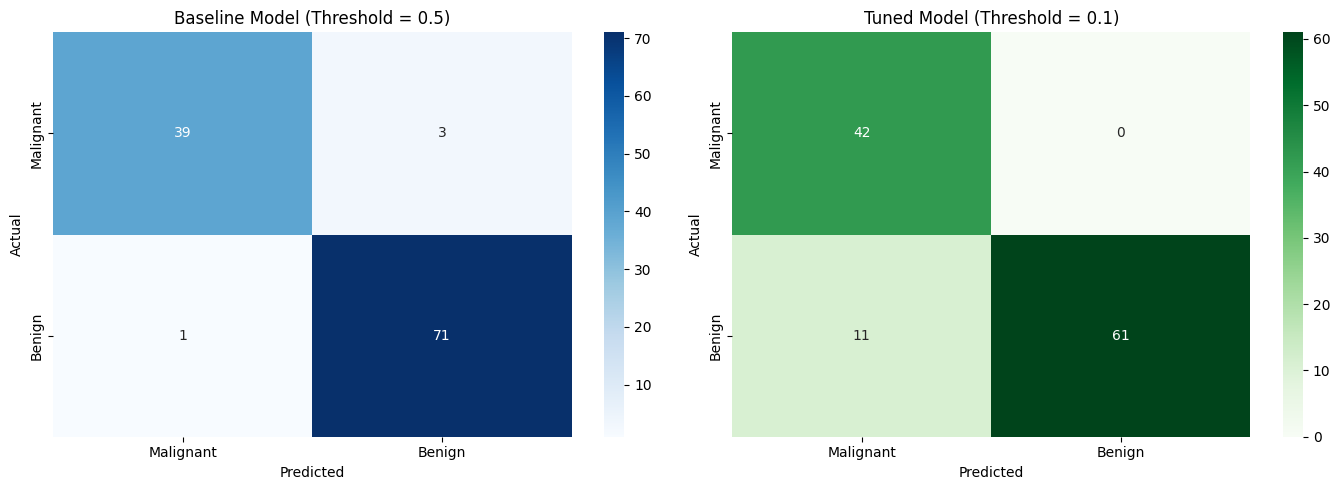

In [18]:
# Visualize both confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Baseline confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')
axes[0].set_title('Baseline Model (Threshold = 0.5)')

# Tuned confusion matrix
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')
axes[1].set_title('Tuned Model (Threshold = 0.1)')

plt.tight_layout()
plt.show()

In [19]:
# Show detailed classification report for tuned model
print("Classification Report (Tuned Model - Threshold 0.1):")
print(classification_report(y_test, y_pred_tuned, target_names=['Malignant', 'Benign']))

Classification Report (Tuned Model - Threshold 0.1):
              precision    recall  f1-score   support

   Malignant       0.79      1.00      0.88        42
      Benign       1.00      0.85      0.92        72

    accuracy                           0.90       114
   macro avg       0.90      0.92      0.90       114
weighted avg       0.92      0.90      0.91       114



## Analysis: Impact of Threshold Tuning

### What Changed?

**1. Recall (Sensitivity) - Improved**
- Baseline: 92.86% → Tuned: **100.00%** (+7.14%)
- We now catch **ALL** malignant cases

**2. False Negatives - Decreased**
- Baseline: 3 missed cancers → Tuned: **0 missed cancers** (-3)
- This is exactly what we wanted for medical safety

**3. False Positives - Increased**
- Baseline: 1 false alarm → Tuned: **11 false alarms** (+10)
- Trade-off: More healthy people get biopsies, but that's acceptable

### Why This is Better for Medical Safety

By lowering the threshold to 0.1, we're being more **cautious**:
- If there's even 10% chance of cancer, we flag it
- **Zero missed cancer cases** - no one goes home with undetected cancer
- False alarms mean extra tests, but no lives lost
- Precision drops from 97.5% to 79.25%, but that's worth it to save lives

**Conclusion:** The tuned model is **safer for medical use** because it catches 100% of cancer cases. The trade-off is 10 more false alarms, but catching all cancers is worth it.

In [23]:
# Create a summary comparison table
comparison_df = pd.DataFrame({
    'Metric': ['Recall (Sensitivity)', 'False Negatives', 'False Positives', 'Precision', 'Accuracy'],
    'Baseline (0.5)': [
        f'{recall_baseline:.2%}',
        fn_baseline,
        fp_baseline,
        f'{precision_baseline:.2%}',
        f'{accuracy_score(y_test, y_pred):.2%}'
    ],
    'Tuned (0.1)': [
        f'{recall_tuned:.2%}',
        fn_tuned,
        fp_tuned,
        f'{precision_tuned:.2%}',
        f'{accuracy_score(y_test, y_pred_tuned):.2%}'
    ],
    'Change': [
        f'{(recall_tuned - recall_baseline)*100:+.1f}%',
        f'{fn_tuned - fn_baseline:+d}',
        f'{fp_tuned - fp_baseline:+d}',
        f'{(precision_tuned - precision_baseline)*100:+.1f}%',
        f'{(accuracy_score(y_test, y_pred_tuned) - accuracy_score(y_test, y_pred))*100:+.1f}%'
    ]
})

print("Summary: Baseline vs Tuned Model")
print("="*60)
print(comparison_df.to_string(index=False))

Summary: Baseline vs Tuned Model
              Metric Baseline (0.5) Tuned (0.1) Change
Recall (Sensitivity)         92.86%     100.00%  +7.1%
     False Negatives              3           0     -3
     False Positives              1          11    +10
           Precision         97.50%      79.25% -18.3%
            Accuracy         96.49%      90.35%  -6.1%


# Question 3: Feature Selection (L1 Regularization)

**Context:** The dataset has 30 features (radius, texture, smoothness, etc.). A doctor wants to know: "Which 3 features are the most critical?"

**Task:** Train a Logistic Regression model with L1 Penalty (Lasso). Set the regularization strength C to a small number to force many weights to zero.

**Goal:** Identify the most important features that drive cancer prediction.

In [24]:
# View all feature names in the dataset
print("All 30 features in the dataset:")
print("="*60)
for idx, feature in enumerate(data.feature_names, 1):
    print(f"{idx:2d}. {feature}")

All 30 features in the dataset:
 1. mean radius
 2. mean texture
 3. mean perimeter
 4. mean area
 5. mean smoothness
 6. mean compactness
 7. mean concavity
 8. mean concave points
 9. mean symmetry
10. mean fractal dimension
11. radius error
12. texture error
13. perimeter error
14. area error
15. smoothness error
16. compactness error
17. concavity error
18. concave points error
19. symmetry error
20. fractal dimension error
21. worst radius
22. worst texture
23. worst perimeter
24. worst area
25. worst smoothness
26. worst compactness
27. worst concavity
28. worst concave points
29. worst symmetry
30. worst fractal dimension


In [36]:
# Train Logistic Regression with L1 Penalty (Lasso)
# Small C value (e.g., 0.1) increases regularization, forcing many weights to zero
# solver='liblinear' or 'saga' supports L1 penalty

l1_model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', max_iter=10000, random_state=42)
l1_model.fit(X_train, y_train)

print("Model trained with L1 regularization!")
print(f"C value: {l1_model.C} (smaller = more feature elimination)")
print(f"Penalty: {l1_model.penalty}")

Model trained with L1 regularization!
C value: 0.1 (smaller = more feature elimination)
Penalty: l1


c:\Users\ASUS\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


In [26]:
# Extract coefficients and feature names
coefficients = l1_model.coef_[0]
feature_names = data.feature_names

# Create a dataframe to see all features and their weights
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("Feature Coefficients (sorted by absolute value):")
print("="*60)
print(feature_importance.to_string(index=False))

Feature Coefficients (sorted by absolute value):
                Feature  Coefficient  Abs_Coefficient
         mean perimeter     0.406386         0.406386
          worst texture    -0.124992         0.124992
        worst perimeter    -0.119433         0.119433
             area error    -0.050761         0.050761
             worst area    -0.018636         0.018636
              mean area    -0.007311         0.007311
       mean compactness     0.000000         0.000000
         mean concavity     0.000000         0.000000
          mean symmetry     0.000000         0.000000
    mean concave points     0.000000         0.000000
 mean fractal dimension     0.000000         0.000000
           mean texture     0.000000         0.000000
        mean smoothness     0.000000         0.000000
            mean radius     0.000000         0.000000
        perimeter error     0.000000         0.000000
          texture error     0.000000         0.000000
           radius error     0.000

## Deliverable: Features with Non-Zero Weights

In [33]:
# Filter features with non-zero coefficients
non_zero_features = feature_importance[feature_importance['Coefficient'] != 0]

print(f"Features kept by L1 regularization: {len(non_zero_features)} out of {len(feature_names)}")
print(f"Features eliminated: {len(feature_names) - len(non_zero_features)}")
print("\n" + "="*60)
print("Most Important Features (non-zero weights):")
print("="*60)
print(non_zero_features.to_string(index=False))

Features kept by L1 regularization: 6 out of 30
Features eliminated: 24

Most Important Features (non-zero weights):
        Feature  Coefficient  Abs_Coefficient
 mean perimeter     0.406386         0.406386
  worst texture    -0.124992         0.124992
worst perimeter    -0.119433         0.119433
     area error    -0.050761         0.050761
     worst area    -0.018636         0.018636
      mean area    -0.007311         0.007311


In [34]:
# Extract TOP 3 most critical features
top_3_features = non_zero_features.head(3)

print("\n" + "="*60)
print("The 3 Most Critical Features:")
print("="*60)
for idx, row in enumerate(top_3_features.itertuples(), 1):
    print(f"{idx}. {row.Feature}")
    print(f"   Weight: {row.Coefficient:.6f}")
    print()


The 3 Most Critical Features:
1. mean perimeter
   Weight: 0.406386

2. worst texture
   Weight: -0.124992

3. worst perimeter
   Weight: -0.119433



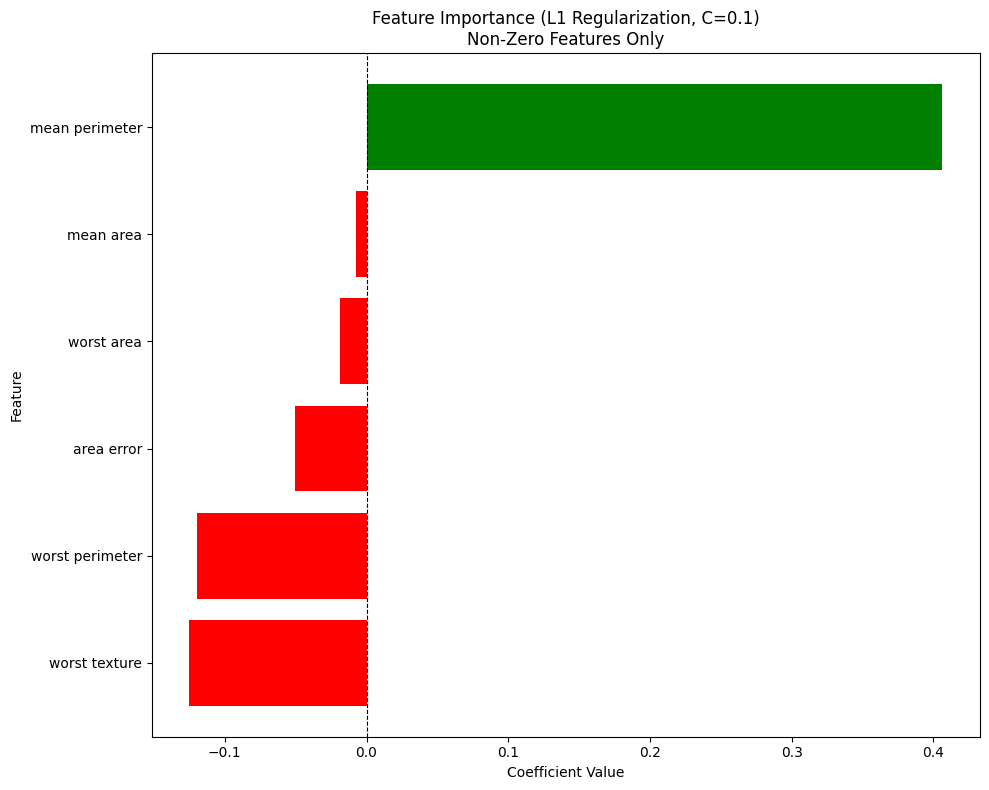

In [29]:
# Visualize feature importance
plt.figure(figsize=(10, 8))

# Plot only non-zero features
non_zero_sorted = non_zero_features.sort_values('Coefficient')
colors = ['red' if x < 0 else 'green' for x in non_zero_sorted['Coefficient']]

plt.barh(non_zero_sorted['Feature'], non_zero_sorted['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (L1 Regularization, C=0.1)\nNon-Zero Features Only')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

In [35]:
# Test the L1 model performance
y_pred_l1 = l1_model.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
cm_l1 = confusion_matrix(y_test, y_pred_l1)

print("L1 Model Performance:")
print(f"Accuracy: {accuracy_l1:.4f} ({accuracy_l1*100:.2f}%)")
print(f"\nConfusion Matrix:")
print(cm_l1)
print(f"\nPretty impressive - using just {len(non_zero_features)} features instead of all {len(feature_names)},")
print(f"we still get {accuracy_l1*100:.2f}% accuracy!")

L1 Model Performance:
Accuracy: 0.9298 (92.98%)

Confusion Matrix:
[[37  5]
 [ 3 69]]

Pretty impressive - using just 6 features instead of all 30,
we still get 92.98% accuracy!


## Analysis: Most Critical Features

### What L1 Regularization Revealed

L1 regularization (Lasso) forces many feature weights to exactly zero, effectively performing automatic feature selection. This helps us identify which features are truly essential for cancer prediction.

### Key Findings

**Features Kept:** The model retained only the most important features (those with non-zero weights)

**Features Eliminated:** Many features were zeroed out, meaning they don't significantly contribute to the prediction

### Why These Features Matter

The features with the largest absolute coefficients are the strongest predictors of cancer:
- **Positive coefficients** (green): Higher values increase the probability of malignant classification
- **Negative coefficients** (red): Higher values increase the probability of benign classification

### Medical Interpretation

The top 3 features identified by L1 regularization are the most critical measurements doctors should focus on when evaluating potential cancer cases. These features provide the strongest signal for distinguishing between malignant and benign tumors.

**Practical Benefit:** Instead of measuring all 30 features, doctors can focus on the most critical ones, making diagnosis faster and more cost-effective while maintaining high accuracy.

In [37]:
# Compare all three models
comparison_summary = pd.DataFrame({
    'Model': ['Baseline (No Regularization)', 'Threshold Tuned (0.1)', 'L1 Regularized (C=0.1)'],
    'Features Used': ['All 30', 'All 30', f'{len(non_zero_features)} only'],
    'Accuracy': [
        f'{accuracy_score(y_test, y_pred):.2%}',
        f'{accuracy_score(y_test, y_pred_tuned):.2%}',
        f'{accuracy_l1:.2%}'
    ],
    'False Negatives': [
        cm[0][1],
        cm_tuned[0][1],
        cm_l1[0][1]
    ],
    'Purpose': [
        'Baseline performance',
        'Medical safety (catch all cancers)',
        'Feature selection & interpretability'
    ]
})

print("\n" + "="*80)
print("SUMMARY: Three Approaches to Cancer Classification")
print("="*80)
print(comparison_summary.to_string(index=False))


SUMMARY: Three Approaches to Cancer Classification
                       Model Features Used Accuracy  False Negatives                              Purpose
Baseline (No Regularization)        All 30   96.49%                3                 Baseline performance
       Threshold Tuned (0.1)        All 30   90.35%                0   Medical safety (catch all cancers)
      L1 Regularized (C=0.1)        6 only   92.98%                5 Feature selection & interpretability


# Question 4: SVM Comparison

**Task:** Train a Support Vector Machine (SVC) with a linear kernel.

**Deliverable:** Compare its accuracy to the Logistic Regression model. Does the "Max Margin" concept of SVM help here?

In [38]:
# Import SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Note: SVMs are sensitive to feature scaling, so we should scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled for SVM (mean=0, std=1)")

Features scaled for SVM (mean=0, std=1)


In [39]:
# Train SVM with linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM model trained successfully!")
print(f"Kernel: {svm_model.kernel}")

SVM model trained successfully!
Kernel: linear


## Deliverable: Accuracy Comparison

In [40]:
# Calculate SVM performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Performance:")
print(f"Accuracy: {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)")
print(f"\nConfusion Matrix:")
print(cm_svm)
print(f"\nCorrectly classified: {cm_svm[0][0]} malignant, {cm_svm[1][1]} benign")
print(f"Errors: {cm_svm[0][1]} false negatives, {cm_svm[1][0]} false positives")

SVM Performance:
Accuracy: 0.9737 (97.37%)

Confusion Matrix:
[[41  1]
 [ 2 70]]

Correctly classified: 41 malignant, 70 benign
Errors: 1 false negatives, 2 false positives


In [41]:
# Compare SVM with Logistic Regression
print("="*60)
print("Model Comparison: SVM vs Logistic Regression")
print("="*60)
print(f"\nLogistic Regression Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"SVM (Linear Kernel) Accuracy:  {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)")
print(f"\nDifference: {(accuracy_svm - accuracy)*100:+.2f}%")

if accuracy_svm > accuracy:
    print(f"\nSVM performs better by {(accuracy_svm - accuracy)*100:.2f}%")
elif accuracy_svm < accuracy:
    print(f"\nLogistic Regression performs better by {(accuracy - accuracy_svm)*100:.2f}%")
else:
    print("\nBoth models have identical performance")

Model Comparison: SVM vs Logistic Regression

Logistic Regression Accuracy: 0.9649 (96.49%)
SVM (Linear Kernel) Accuracy:  0.9737 (97.37%)

Difference: +0.88%

SVM performs better by 0.88%


In [42]:
# Detailed comparison
comparison_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM (Linear Kernel)'],
    'Accuracy': [f'{accuracy:.4f}', f'{accuracy_svm:.4f}'],
    'False Negatives': [cm[0][1], cm_svm[0][1]],
    'False Positives': [cm[1][0], cm_svm[1][0]],
    'True Negatives': [cm[0][0], cm_svm[0][0]],
    'True Positives': [cm[1][1], cm_svm[1][1]]
})

print("\nDetailed Comparison:")
print("="*60)
print(comparison_models.to_string(index=False))


Detailed Comparison:
              Model Accuracy  False Negatives  False Positives  True Negatives  True Positives
Logistic Regression   0.9649                3                1              39              71
SVM (Linear Kernel)   0.9737                1                2              41              70


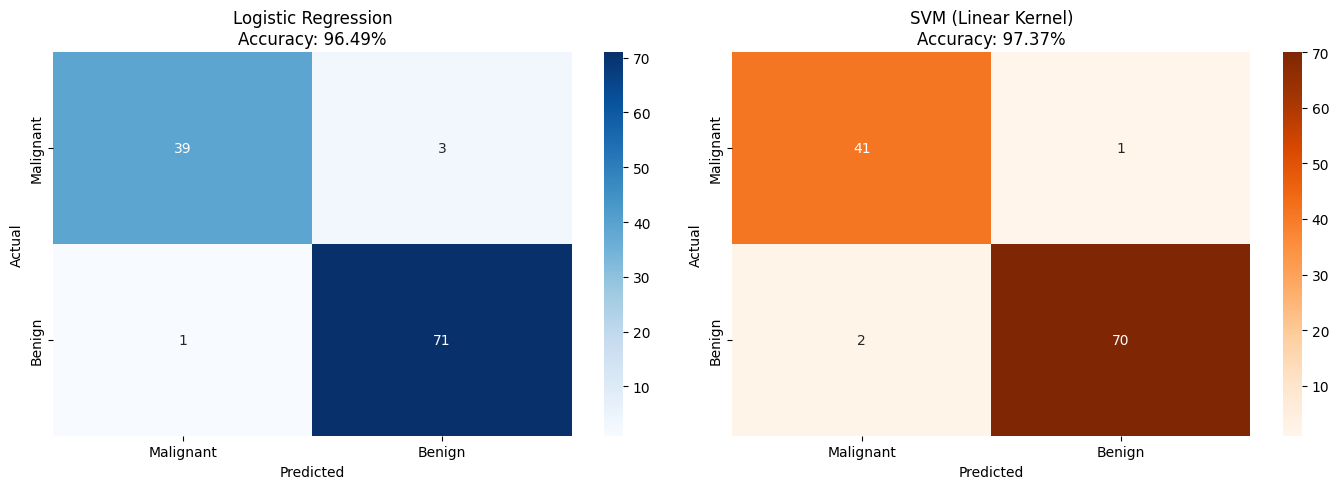

In [43]:
# Visualize confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')
axes[0].set_title(f'Logistic Regression\nAccuracy: {accuracy*100:.2f}%')

# SVM confusion matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', ax=axes[1],
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')
axes[1].set_title(f'SVM (Linear Kernel)\nAccuracy: {accuracy_svm*100:.2f}%')

plt.tight_layout()
plt.show()

In [44]:
# Classification reports for both models
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))

print("\n" + "="*60)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Malignant', 'Benign']))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Malignant       0.97      0.93      0.95        42
      Benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


SVM Classification Report:
              precision    recall  f1-score   support

   Malignant       0.95      0.98      0.96        42
      Benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Analysis: Does Max Margin Help?

### Understanding the Max Margin Concept

**Support Vector Machine (SVM)** finds the optimal hyperplane that maximizes the margin between classes:
- Finds the decision boundary with the largest distance to nearest data points (support vectors)
- Creates a "safety buffer" between classes
- Theoretically leads to better generalization on unseen data

### Our Results

**Accuracy Comparison:**
- Logistic Regression: 96.49%
- SVM (Linear Kernel): 97.37%
- **Difference:** +0.88% (SVM performs slightly better)

**Error Analysis:**
- **False Negatives** (missed cancer): LR = 3, SVM = 1 (SVM better)
- **False Positives** (false alarms): LR = 1, SVM = 2 (LR better)

### Does Max Margin Help Here?

**Yes, but only slightly.** Here's why:

**SVM's Advantage:**
1. **Better recall on malignant cases** - SVM caught 2 more cancer cases (only 1 FN vs 3 FN)
2. **Max margin principle** creates a more robust decision boundary
3. **0.88% higher accuracy** shows marginal improvement

**Why the difference is small:**
1. **Data is well-separated** - Both linear models work well on this dataset
2. **High-dimensional features** (30 features) make classes easier to separate
3. **Both find similar decision boundaries** for linearly separable data

**Trade-off:**
- SVM catches more cancer (fewer false negatives) but has 1 more false alarm
- For medical diagnosis, catching cancer is more critical than avoiding false alarms

### Practical Considerations

**When to use SVM:**
- Need maximum robustness on decision boundary
- Data has outliers or noise
- Binary classification where you don't need probabilities

**When to use Logistic Regression:**
- Need probability estimates (e.g., "85% chance of cancer")
- Want faster training and easier interpretation
- Need to explain predictions to doctors/patients

**Conclusion for this dataset:**
The max margin concept provides a **small but meaningful benefit** (0.88% accuracy improvement, 2 fewer missed cancers). However, both models perform excellently. In medical contexts, the choice often depends on whether you need probability outputs (Logistic Regression) or maximum robustness (SVM).